In [4]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import functions
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.image as mpimg

In [5]:
# IMPORT PORTFOLIO DATA FROM "PORTFOLIO" DATASET WHICH IS BROKEN DOWN BY DAY
df_portfolio = pd.read_csv('data/SB-County-County-Public-Portfolio-stations-report-01_01_20-12_31_24.csv', low_memory=False)
# print(df_portfolio.head())
print(f"The dataframe has {df_portfolio.shape[0]} and {df_portfolio.shape[1]} columns")

The dataframe has 88919 and 30 columns


## Data Analysis

### Santa Barbara County Reporting Data

In [6]:
print(f"The dataframe has {df_portfolio.shape[0]} and {df_portfolio.shape[1]} columns")

The dataframe has 88919 and 30 columns


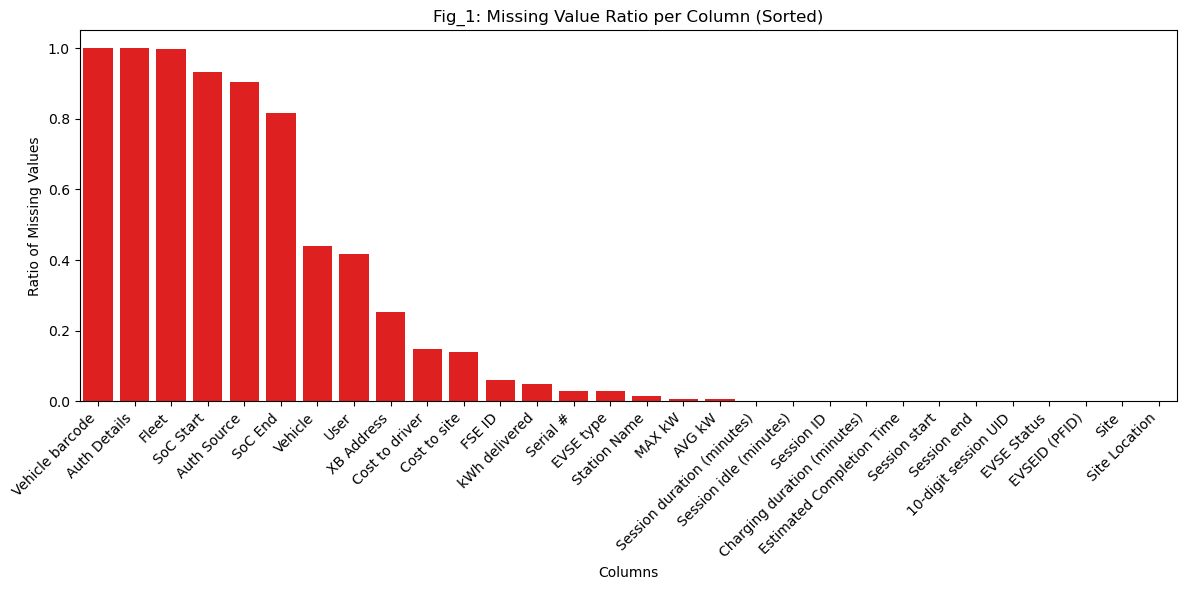

In [7]:
# Gets the mean of missing values in each column. Since True = 1 and False = 0 the mean tells us how much of the data is missing.
df_portfolio_w_missing_values = df_portfolio.isnull().mean().sort_values(ascending=False)

# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = sns.barplot(x=df_portfolio_w_missing_values.index, y=df_portfolio_w_missing_values.values, color='red')

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Ratio of Missing Values')
plt.title('Fig_1: Missing Value Ratio per Column (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('images/fig1.jpg')

# Show the plot
plt.show()

In [8]:
# Basic Statistical Analysis
df_portfolio.describe()

,10-digit session UID,Session duration (minutes),Charging duration (minutes),Session idle (minutes),kWh delivered,MAX kW,AVG kW,User,Vehicle,Cost to site,Cost to driver,Vehicle barcode
count,8.891900e+04,88758.000000,88919.000000,88758.000000,84516.000000,88439.000000,88439.000000,51820.000000,4.986000e+04,76531.000000,75673.000000,0.0
mean,2.648512e+08,810.169037,122.860643,687.085473,11.409536,10.052329,6.417935,78241.891702,6.866096e+04,20.366966,2.700200,NaN
std,1.676411e+08,3682.511037,593.476016,3549.077786,14.028437,18.549601,13.213645,61263.389467,6.493613e+05,150.350882,57.206936,NaN
min,6.171300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.097500e+04,0.000000,-9.925000,NaN
25%,6.437734e+07,15.172500,0.250000,0.930000,0.012000,0.000000,0.000000,25380.000000,3.978600e+04,0.030000,0.000000,NaN
50%,3.426163e+08,113.200000,53.470000,2.580000,6.236500,5.905000,1.583000,52999.000000,4.340100e+04,1.390000,0.342000,NaN
75%,4.086744e+08,265.665000,187.000000,109.765000,17.358500,6.632000,5.803000,124044.000000,4.575000e+04,3.755500,2.455000,NaN
max,4.585894e+08,436664.600000,140922.020000,436664.600000,119.160000,517.170000,98.995000,233907.000000,1.000000e+08,9419.469000,8803.390000,NaN


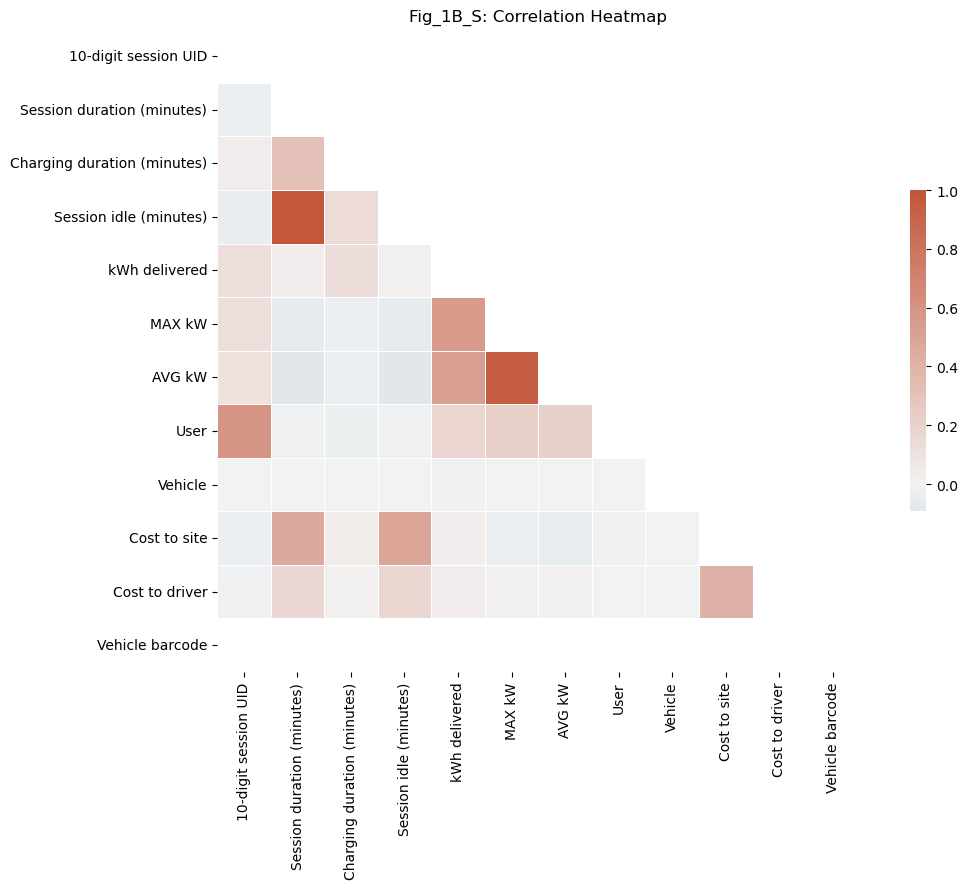

In [10]:
# Get correlations between the features 
df_portfolio_corr = df_portfolio.corr()
# print(df_portfolio_corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_portfolio_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_portfolio_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Fig_1B_S: Correlation Heatmap')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/portfolio/fig1B_S.jpg')

# Show the plot
plt.show()

In [ ]:
# Top Correlations

# NOTE: I don't think this is useful as is but might be helpful if we want to filter down to some more useful correlations.

# Convert correlation matrix to a series for easier manipulation
corr_pairs = df_portfolio_corr.unstack()

# Remove self-correlations (which are always 1)
corr_pairs = corr_pairs[corr_pairs < 1]

# Get absolute values for sorting (to include negative correlations)
corr_pairs_abs = corr_pairs.abs().sort_values(ascending=False)

# Get top 5 correlations (these will be the strongest positive and negative)
top_5_correlations = corr_pairs_abs.head(5)

# Display the results with their actual correlation values (not absolute)
for idx, (pair, _) in enumerate(top_5_correlations.items(), 1):
    feature1, feature2 = pair
    correlation = corr_pairs[pair]
    print(f"{idx}. {feature1} — {feature2}: {correlation:.4f}")

1. Energy delivered (kWh) — GHGs avoided (lbs): 1.0000
2. GHGs avoided (lbs) — Energy delivered (kWh): 1.0000
3. Gasoline avoided (Gal) — GHGs avoided (lbs): 1.0000
4. GHGs avoided (lbs) — Gasoline avoided (Gal): 1.0000
5. GHGs avoided (lbs) — Electric miles provided (mi): 1.0000


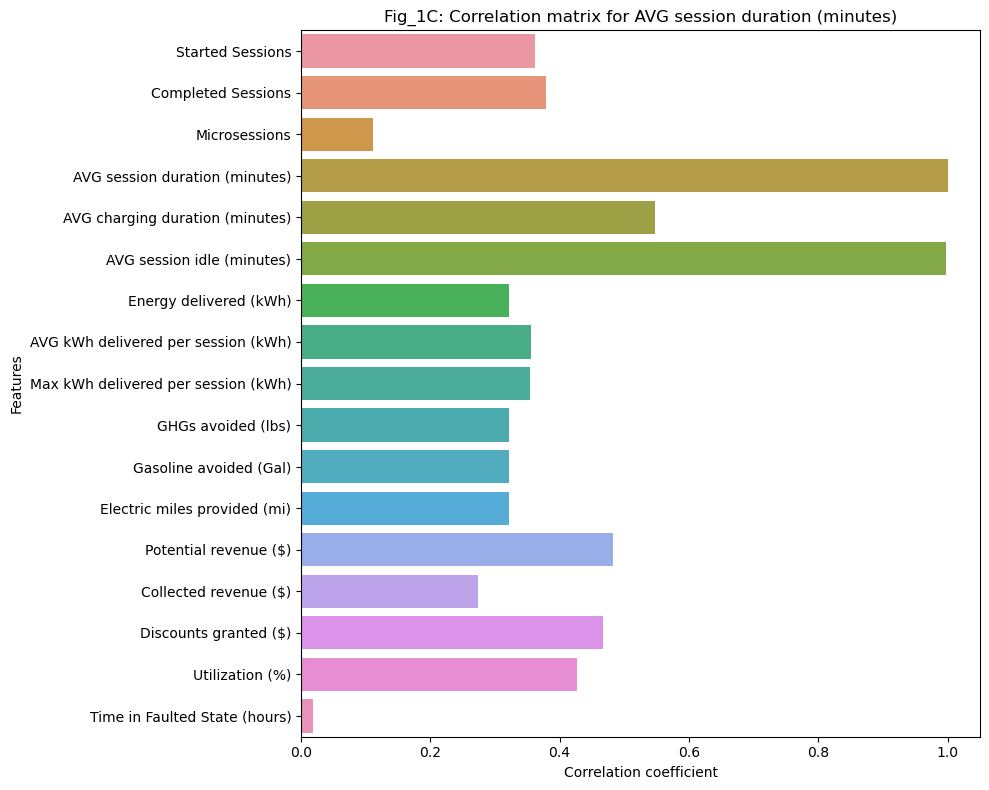

In [ ]:
# Fig_1C: Correlation matrix for AVG session duration (minutes)

# Get correlations between the features 
df_portfolio_corr = df_portfolio.corr()

# Get correlation matrix for AVG session duration (minutes)
df_portfolio_corr_avg_sessions = df_portfolio_corr['AVG session duration (minutes)']

# Seaborn plot for correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=df_portfolio_corr_avg_sessions.values, y=df_portfolio_corr_avg_sessions.index)
plt.title('Fig_1C: Correlation matrix for AVG session duration (minutes)')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig1C.jpg')

# Show the plot
plt.show()

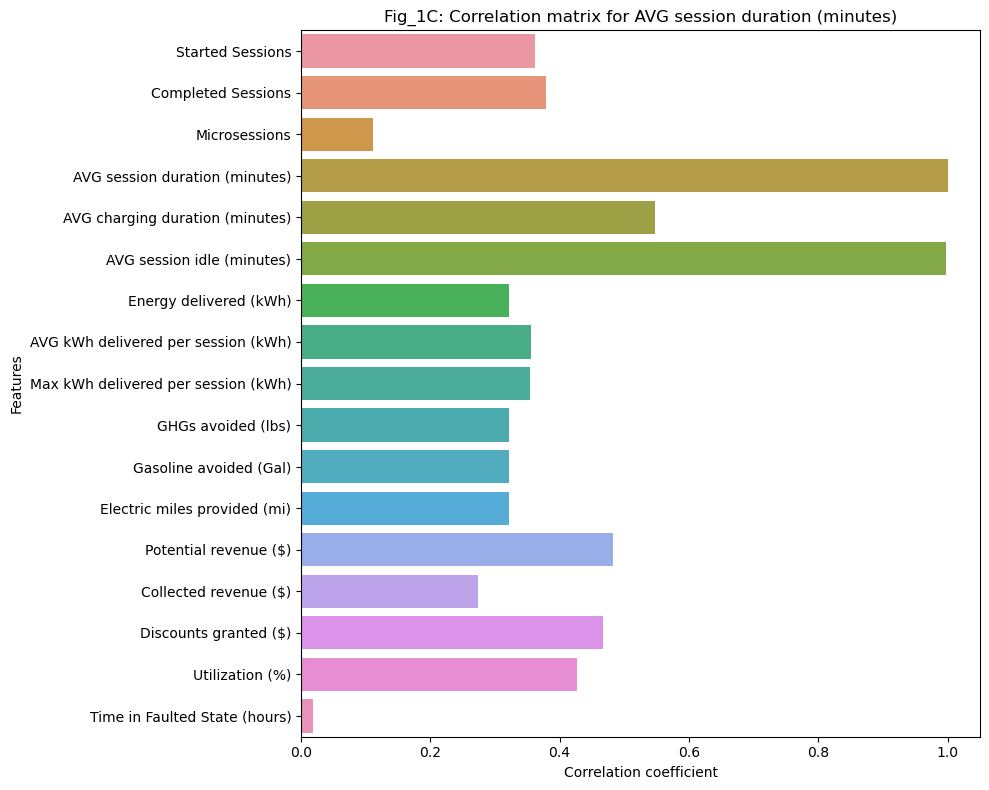

In [ ]:
# Fig_1C: Correlation matrix for AVG session duration (minutes)

# Get correlations between the features 
df_portfolio_corr = df_portfolio.corr()

# Get correlation matrix for AVG session duration (minutes)
df_portfolio_corr_avg_sessions = df_portfolio_corr['AVG session duration (minutes)']

# Seaborn plot for correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=df_portfolio_corr_avg_sessions.values, y=df_portfolio_corr_avg_sessions.index)
plt.title('Fig_1C: Correlation matrix for AVG session duration (minutes)')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig1C.jpg')

# Show the plot
plt.show()

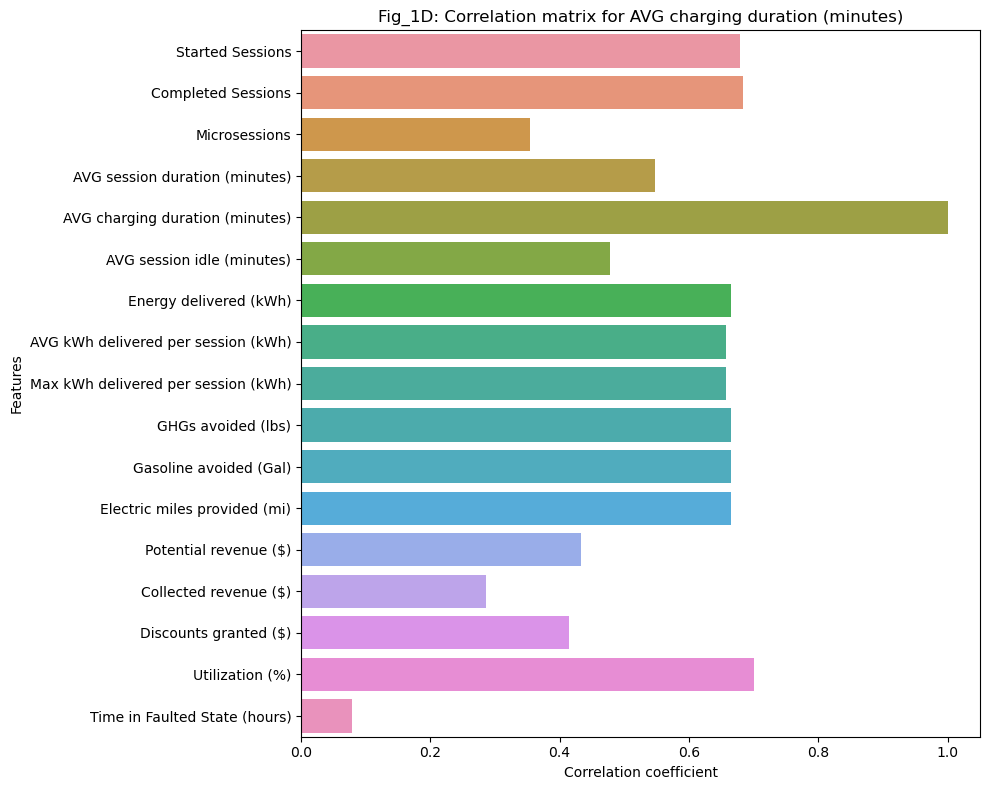

In [ ]:
# Fig_1D: Correlation matrix for AVG charging duration (minutes)

# Get correlations between the features 
df_portfolio_corr = df_portfolio.corr()

# Get correlation matrix for AVG session duration (minutes)
df_portfolio_corr_avg_duration = df_portfolio_corr['AVG charging duration (minutes)']

# Seaborn plot for correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=df_portfolio_corr_avg_duration.values, y=df_portfolio_corr_avg_duration.index)
plt.title('Fig_1D: Correlation matrix for AVG charging duration (minutes)')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig1D.jpg')

# Show the plot
plt.show()

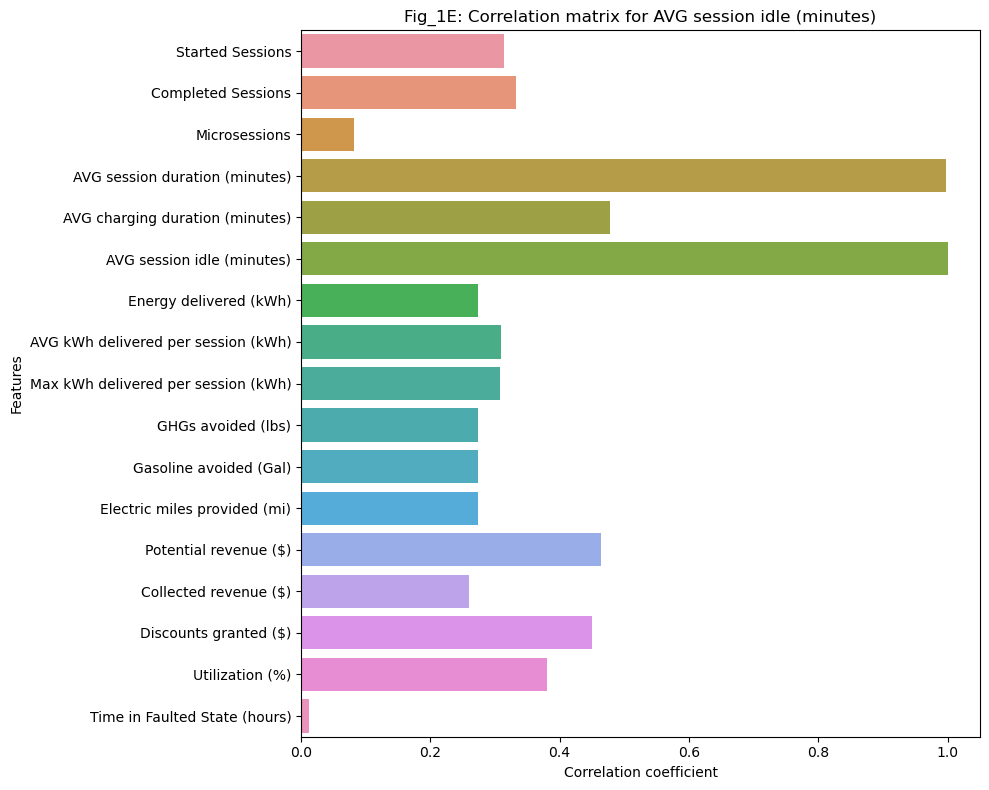

In [ ]:
# Fig_1E: Correlation matrix for AVG session idle (minutes)

# Get correlations between the features 
df_portfolio_corr = df_portfolio.corr()

# Get correlation matrix for AVG session duration (minutes)
df_portfolio_corr_avg_idle = df_portfolio_corr['AVG session idle (minutes)']

# Seaborn plot for correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=df_portfolio_corr_avg_idle.values, y=df_portfolio_corr_avg_idle.index)
plt.title('Fig_1E: Correlation matrix for AVG session idle (minutes)')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig1E.jpg')

# Show the plot
plt.show()

## Energy Delivered (kWh) vs Completed Sessions - Explore SB County Question 

### Analysing Portfolio Data Set
report: https://colab.research.google.com/drive/1NAge1_GYw95EISVNFlWXOUP2JGTZAvxp#scrollTo=xRVDbcpiPBHQ

In [108]:
# IMPORT PORTFOLIO DATA
df_portfolio = pd.read_csv('data/SB-County-County-Public-Portfolio-stations-report-01_01_20-12_31_24.csv', low_memory=False)
# print(df_portfolio.head())
print(f"The dataframe has {df_portfolio.shape[0]} and {df_portfolio.shape[1]} columns")

The dataframe has 88919 and 30 columns


### Filtering out SB County Fleet Data to Focus on Public Usage

Based on this spreadsheet. NEED CONFIRMATION FROM JEREL AS HE IS DOUBLECHECKING THIS LIST: https://docs.google.com/spreadsheets/d/1xRGK_ZnoM93P0HDJcok5WfZFDcxvYETne-_3y1qC_dE/edit?pli=1&gid=0#gid=0r Road"
]0 Foster Road

In [109]:
df_portfolio.columns

Index(['10-digit session UID', 'Session ID', 'Session start', 'Session end',
       'Session duration (minutes)', 'Charging duration (minutes)',
       'Session idle (minutes)', 'Estimated Completion Time', 'kWh delivered',
       'MAX kW', 'AVG kW', 'SoC Start', 'SoC End', 'User', 'Vehicle',
       'EVSE Status', 'EVSEID (PFID)', 'FSE ID', 'XB Address', 'Serial #',
       'EVSE type', 'Station Name', 'Site', 'Site Location', 'Cost to site',
       'Cost to driver', 'Auth Source', 'Auth Details', 'Fleet',
       'Vehicle barcode'],
      dtype='object')

In [110]:
df_portfolio = df_portfolio[['Session start', 'Session end',
       'Session duration (minutes)', 'Charging duration (minutes)',
       'Session idle (minutes)', 'Estimated Completion Time', 'kWh delivered',
       'MAX kW', 'AVG kW', 'SoC Start', 'SoC End', 'User', 'Vehicle',
       'EVSE Status', 'EVSE type', 'Station Name', 'Site', 'Site Location', 'Cost to site',
       'Cost to driver', 'Auth Source']]

In [111]:
df_portfolio['EVSE type'].value_counts()

Webasto DX          66442
Delta DCFC 100kW    19922
AeroVironment          33
Name: EVSE type, dtype: int64

In [115]:
# Station names to filter from Delta type stations
station_names_to_include_from_delta = [
    "SBCounty_Admin_DCFC_01",
    "SBCounty_Admin_DCFC_01_b",
    "SBCounty_Health_DCFC_01",
    "SBCounty_Health_DCFC_01_b",
    "SBCounty_Health_DCFC_02",
    "SBCounty_Health_DCFC_02_b"
]

df_portfolio_delta = df_portfolio.query("`Station Name` in @station_names_to_include_from_delta and `EVSE type` == 'Delta DCFC 100kW'")

sites_to_include_for_webasto = [
    "SB Admin",
    "SBAPCD",
    "SB CARP Lookout Park",
    "SB CARP South Via Real",
    "SB Health Services",
    "SB IV Embarcadero",
    "SB Jail",
    "SM PW 620 Foster Road"
]

# Apply both filters using query
df_portfolio_webasto = df_portfolio.query("Site in @sites_to_include_for_webasto and `EVSE type` == 'Webasto DX'")

# Concatenate the two dataframes
df_portfolio = pd.concat([df_portfolio_delta, df_portfolio_webasto])

# Display site counts in the combined dataframe
df_portfolio['Site'].value_counts()

SB Admin                  28061
SB Health Services        21084
SB Jail                    3674
SB CARP South Via Real     2791
SB IV Embarcadero          2523
SB CARP Lookout Park       1791
Name: Site, dtype: int64

In [116]:
df_portfolio['EVSE type'].value_counts()

Webasto DX          40002
Delta DCFC 100kW    19922
Name: EVSE type, dtype: int64

In [117]:
# Clean up portfolio data

In [118]:
# Instead of using query with quotes, let's use direct filtering
df_portfolio_session_completed = df_portfolio[df_portfolio['kWh delivered'] > 0.01]

print(f"Completed Sessions: {df_portfolio_session_completed.shape[0]}")
print(f"All Sessions: {df_portfolio.shape[0]}")
print(f"Non-completed Sessions: {df_portfolio.shape[0] - df_portfolio_session_completed.shape[0]}")

# Calculate completion percentage
completion_rate = (df_portfolio_session_completed.shape[0] / df_portfolio.shape[0]) * 100
print(f"Completion Rate: {completion_rate:.2f}%")

Completed Sessions: 41742
All Sessions: 59924
Non-completed Sessions: 18182
Completion Rate: 69.66%


In [119]:
# Calculate percentage of completed vs. non-completed sessions
completed_sessions = df_portfolio_session_completed.shape[0]
all_sessions = df_portfolio.shape[0]
non_completed_sessions = all_sessions - completed_sessions
completion_rate = (completed_sessions / all_sessions) * 100

print(f"Completed Sessions: {completed_sessions} ({completion_rate:.2f}%)")
print(f"Non-completed Sessions: {non_completed_sessions} ({100-completion_rate:.2f}%)")

# First, create your filtered DataFrame using a clear copy
zero_energy_sessions = df_portfolio[df_portfolio['kWh delivered'] <= 0.01].copy()

# Check for patterns in non-completed sessions
# Duration statistics
if 'Session duration (minutes)' in zero_energy_sessions.columns:
    print(f"\nNon-completed session duration statistics:")
    print(zero_energy_sessions['Session duration (minutes)'].describe())

# Vehicle type breakdown
if 'Vehicle' in zero_energy_sessions.columns:
    print(f"\nVehicle types in non-completed sessions:")
    print(zero_energy_sessions['Vehicle'].value_counts().head())

# Status breakdown
if 'EVSE Status' in zero_energy_sessions.columns:
    print(f"\nEVSE status in non-completed sessions:")
    print(zero_energy_sessions['EVSE Status'].value_counts())

# Time of day analysis
if 'Session start' in zero_energy_sessions.columns:
    zero_energy_sessions['Hour'] = pd.to_datetime(zero_energy_sessions['Session start']).dt.hour
    print(f"\nHourly distribution of non-completed sessions:")
    print(zero_energy_sessions['Hour'].value_counts().sort_index())


Completed Sessions: 41742 (69.66%)
Non-completed Sessions: 18182 (30.34%)

Non-completed session duration statistics:
count    14933.000000
mean       301.150928
std       2589.697827
min          0.000000
25%          0.780000
50%          2.250000
75%         26.780000
max      95409.050000
Name: Session duration (minutes), dtype: float64

Vehicle types in non-completed sessions:
42191.0    452
43954.0    378
38187.0    216
39838.0    193
45750.0    190
Name: Vehicle, dtype: int64

EVSE status in non-completed sessions:
FINISHED    14933
Name: EVSE Status, dtype: int64

Hourly distribution of non-completed sessions:
0      136
1      128
2      117
3       87
4      116
5      135
6      309
7      712
8      947
9      954
10    1112
11    1165
12    1193
13    1262
14    1156
15    1108
16    1153
17     938
18     657
19     480
20     378
21     323
22     242
23     125
Name: Hour, dtype: int64


In [120]:
# Create filtered DataFrame for completed sessions
completed_energy_sessions = df_portfolio[df_portfolio['kWh delivered'] > 0.01].copy()

# Duration statistics
if 'Session duration (minutes)' in completed_energy_sessions.columns:
    print(f"\nCompleted session duration statistics:")
    print(completed_energy_sessions['Session duration (minutes)'].describe())

# Vehicle type breakdown
if 'Vehicle' in completed_energy_sessions.columns:
    print(f"\nVehicle types in completed sessions:")
    print(completed_energy_sessions['Vehicle'].value_counts().head())

# Status breakdown
if 'EVSE Status' in completed_energy_sessions.columns:
    print(f"\nEVSE status in completed sessions:")
    print(completed_energy_sessions['EVSE Status'].value_counts())

# Time of day analysis
if 'Session start' in completed_energy_sessions.columns:
    completed_energy_sessions['Hour'] = pd.to_datetime(completed_energy_sessions['Session start']).dt.hour
    print(f"\nHourly distribution of completed sessions:")
    print(completed_energy_sessions['Hour'].value_counts().sort_index())

# Additional insights for completed sessions
if 'kWh delivered' in completed_energy_sessions.columns:
    print(f"\nEnergy delivery statistics (kWh):")
    print(completed_energy_sessions['kWh delivered'].describe())

# Analyze charging efficiency
if all(col in completed_energy_sessions.columns for col in ['Charging duration (minutes)', 'kWh delivered']):
    completed_energy_sessions['kWh per minute'] = completed_energy_sessions['kWh delivered'] / completed_energy_sessions['Charging duration (minutes)']
    print(f"\nCharging efficiency statistics (kWh per minute):")
    print(completed_energy_sessions['kWh per minute'].describe())



Completed session duration statistics:
count     41650.000000
mean        943.476676
std        3251.276318
min           0.000000
25%          50.270000
50%         147.690000
75%         367.667500
max      157077.680000
Name: Session duration (minutes), dtype: float64

Vehicle types in completed sessions:
42191.0    1468
43954.0    1303
39190.0    1091
38187.0     946
45750.0     919
Name: Vehicle, dtype: int64

EVSE status in completed sessions:
FINISHED    41742
Name: EVSE Status, dtype: int64

Hourly distribution of completed sessions:
0      200
1      216
2      293
3      250
4      291
5      442
6     1555
7     3059
8     2829
9     2542
10    2953
11    3034
12    3472
13    3309
14    3223
15    3558
16    3654
17    2528
18    1395
19     965
20     747
21     546
22     382
23     299
Name: Hour, dtype: int64

Energy delivery statistics (kWh):
count    41742.000000
mean        16.354704
std         15.614989
min          0.011000
25%          4.699250
50%         11.39

In [121]:
# Compare idle time between completed and non-completed sessions
if 'Session idle (minutes)' in df_portfolio.columns:
    print("\nIdle time comparison:")
    print(f"Average idle time for completed sessions: {completed_energy_sessions['Session idle (minutes)'].mean():.2f} minutes")
    print(f"Average idle time for non-completed sessions: {zero_energy_sessions['Session idle (minutes)'].mean():.2f} minutes")

# Compare by location
if 'Site Location' in df_portfolio.columns:
    completed_location_counts = completed_energy_sessions['Site Location'].value_counts()
    non_completed_location_counts = zero_energy_sessions['Site Location'].value_counts()
    
    total_by_location = df_portfolio['Site Location'].value_counts()
    
    # Calculate completion rate by location
    print("\nTop locations by completion rate:")
    for location in total_by_location.index[:5]:
        completed = completed_location_counts.get(location, 0)
        total = total_by_location.get(location)
        rate = (completed / total) * 100 if total > 0 else 0
        print(f"{location}: {rate:.2f}% completion rate ({completed}/{total})")


Idle time comparison:
Average idle time for completed sessions: 782.11 minutes
Average idle time for non-completed sessions: 290.46 minutes

Top locations by completion rate:
105 E. Anapamu St, Santa Barbara, CA 93101: 66.84% completion rate (18755/28061)
315 Camino del Remedio, Santa Barbara, CA  93110: 71.35% completion rate (15044/21084)
4430 Calle Real, Santa Barbara, CA 93110: 86.39% completion rate (3174/3674)
6728 Via Real, Carpinteria, CA 93013: 68.94% completion rate (1924/2791)
881 Embarcadero del Mar, Isla Vista, CA 93117: 71.78% completion rate (1811/2523)


In [122]:
df_portfolio.columns

Index(['Session start', 'Session end', 'Session duration (minutes)',
       'Charging duration (minutes)', 'Session idle (minutes)',
       'Estimated Completion Time', 'kWh delivered', 'MAX kW', 'AVG kW',
       'SoC Start', 'SoC End', 'User', 'Vehicle', 'EVSE Status', 'EVSE type',
       'Station Name', 'Site', 'Site Location', 'Cost to site',
       'Cost to driver', 'Auth Source'],
      dtype='object')

### Context: County has a 4 hour charging policy. 
Price increases per minute to stay plugged in 
#### 
Hypothesis: Average Session duration should be around 4 hours
Average Charging duration should be much lower than 4 hours 


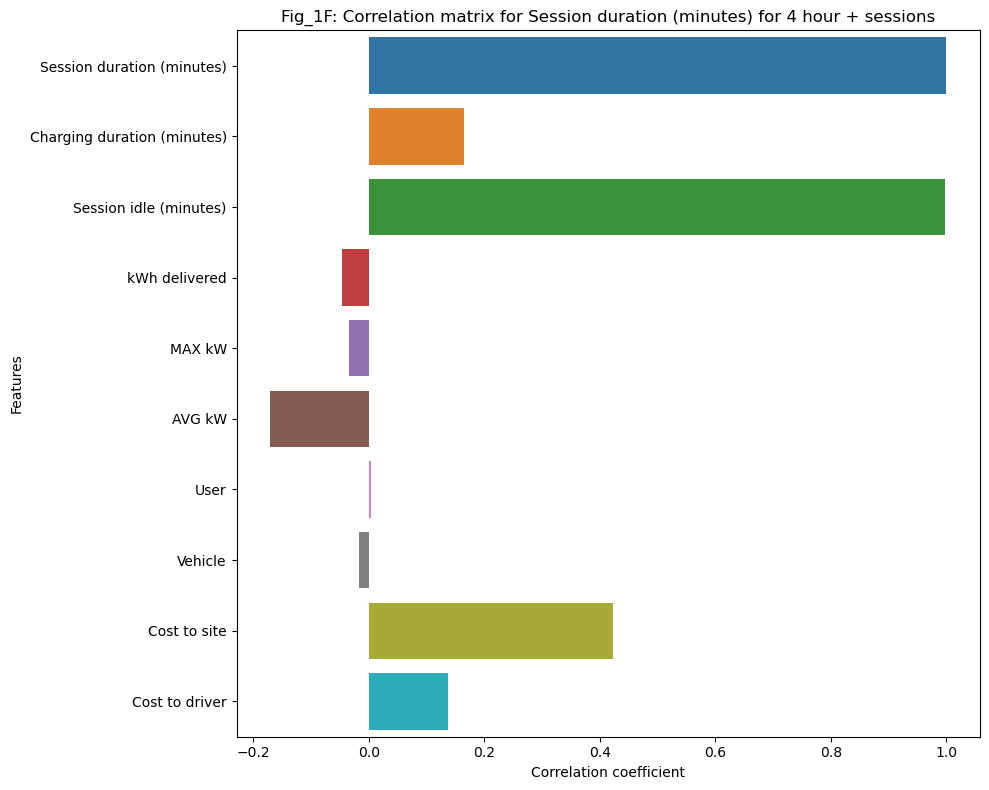

In [123]:
# Fig_1F: Correlation matrix for sessions longer than 4 hours (180 minutes)

# Get correlations between the features 
long_sessions_corr = df_portfolio[df_portfolio['Session duration (minutes)'] > 240].corr()

# Get correlation matrix for AVG session duration (minutes)
long_sessions_corr_mtx = long_sessions_corr['Session duration (minutes)']

# Seaborn plot for correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=long_sessions_corr_mtx.values, y=long_sessions_corr_mtx.index)
plt.title('Fig_1F: Correlation matrix for Session duration (minutes) for 4 hour + sessions')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig1F.jpg')

# Show the plot
plt.show()

In [124]:
df_portfolio['EVSE type'].value_counts()

Webasto DX          40002
Delta DCFC 100kW    19922
Name: EVSE type, dtype: int64

### When EVSE Type is Webasto and from Public Sites - Average Session Duration (total time EV Plugged into station) vs Average Charging Duration (total time EV: receiving electrons) ?

How long are the charging sessions? - By Level 2 vs Level 3 (Column name: EVSE Type)?
 
How long are the session durations? By Level 2 vs Level?
 3
How long is the charging duration ? by Level 2 vs Leve?
l 3
Level 2: Webasto 
Level 3: Delta 


In [125]:
# Filter by Level 2 charging method and Describe statistics
df_portfolio_lvl2 = df_portfolio[df_portfolio['EVSE type'] == 'Webasto DX'].copy()
stats_df_webasto = df_portfolio_lvl2.describe()
stats_df_webasto.to_csv('webasto_dx_statistics.csv')
stats_df_webasto

,Session duration (minutes),Charging duration (minutes),Session idle (minutes),kWh delivered,MAX kW,AVG kW,User,Vehicle,Cost to site,Cost to driver
count,39949.000000,40002.000000,39949.000000,38669.000000,39999.000000,39999.000000,17902.000000,17192.000000,35613.000000,35217.000000
mean,1098.973075,159.235344,939.526519,8.945442,4.089473,2.130973,63041.802368,75591.477955,26.868554,1.759903
std,3681.998864,284.610745,3609.980705,11.123705,2.752890,2.367227,51777.155869,178095.069553,145.755397,38.984419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,30975.000000,0.000000,0.000000
25%,44.070000,0.820000,0.870000,0.026000,1.598000,0.025000,25380.000000,39190.000000,0.100000,0.000000
50%,187.980000,96.500000,10.650000,5.465000,5.681000,1.183000,42357.000000,42191.000000,1.138000,0.000000
75%,882.280000,229.875000,402.040000,12.656000,6.468000,3.642000,84445.000000,44444.000000,3.130000,1.387000
max,157077.680000,36979.580000,156307.220000,89.274000,8.434000,8.119000,233853.000000,999999.000000,7624.175000,6130.605000


In [126]:
# Filter by Level 3 charging method and Describe statistics
df_portfolio_lvl3 = df_portfolio[df_portfolio['EVSE type'] == 'Delta DCFC 100kW'].copy()
stats_df_delta = df_portfolio_lvl3.describe()
stats_df_delta.to_csv('delta_statistics.csv')
stats_df_delta

,Session duration (minutes),Charging duration (minutes),Session idle (minutes),kWh delivered,MAX kW,AVG kW,User,Vehicle,Cost to site,Cost to driver
count,19883.000000,19922.000000,19883.000000,18006.000000,19922.000000,19922.000000,16721.000000,1.603500e+04,15258.000000,15257.000000
mean,93.107326,26.133876,66.922144,18.703778,30.587934,20.485755,101959.938700,6.966678e+04,3.210200,3.088248
std,1516.036138,31.011738,1516.541035,19.947959,30.923233,22.330353,68478.464626,1.121923e+06,6.872012,6.877567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,3.097900e+04,0.000000,0.000000
25%,2.350000,0.000000,1.330000,0.000000,0.000000,0.000000,28612.000000,4.219100e+04,0.000000,0.000000
50%,25.250000,16.435000,1.900000,14.008000,32.725000,16.441000,103359.000000,4.395400e+04,2.555500,2.386000
75%,54.365000,45.000000,3.400000,33.367500,53.770000,37.761000,168059.000000,4.575500e+04,5.200000,5.060000
max,117681.100000,347.880000,117681.100000,119.160000,517.170000,98.995000,233907.000000,1.000000e+08,634.279000,634.279000


###  Analysing Daily Reports Dataset 

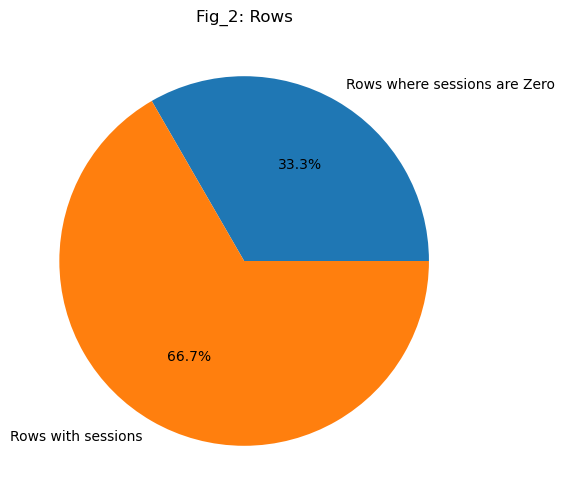

Rows where sessions are Zero 609. Rows with sessions 1218.


In [13]:
# Gets the number of started sessions = 0 and compared to non-zero values. Later in the timeline report we see this changes with time.
count_w_zero_sessions = len(df_reporting[df_reporting["Started Sessions"] == 0])
count_w_sessions = len(df_reporting[df_reporting["Started Sessions"] > 0])
data = [count_w_zero_sessions, count_w_sessions]
# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = plt.pie(data, labels=['Rows where sessions are Zero', 'Rows with sessions'],autopct='%1.1f%%')

# Customize the plot
plt.title('Fig_2: Rows')

# Save the plot
plt.savefig('images/fig2.jpg')

# Show the plot
plt.show()
print(f"Rows where sessions are Zero {count_w_zero_sessions}. Rows with sessions {count_w_sessions}.")


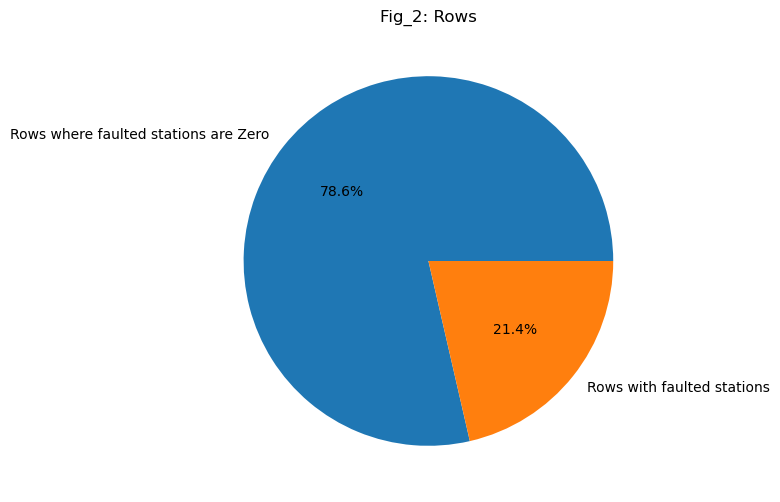

Rows where faulted stations are Zero 1436. Rows with faulted stations 391.


In [14]:
# Gets the mean of missing values in each column. Since True = 1 and False = 0 the mean tells us how much of the data is missing.
count_w_zero_faulted_stations = len(df_reporting[df_reporting["Faulted Stations"] == "-"])
count_w_faulted_stations = len(df_reporting[df_reporting["Faulted Stations"] != "-"])
data = [count_w_zero_faulted_stations, count_w_faulted_stations ]
# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = plt.pie(data, labels=['Rows where faulted stations are Zero', 'Rows with faulted stations'],autopct='%1.1f%%')

# Customize the plot
plt.title('Fig_2: Rows')

# Save the plot
# plt.savefig('images/fig2.jpg')

# Show the plot
plt.show()
print(f"Rows where faulted stations are Zero {count_w_zero_faulted_stations}. Rows with faulted stations {count_w_faulted_stations}.")

In [15]:
df_reporting["Started Sessions"].value_counts()

0      609
36      20
49      20
51      19
3       19
      ... 
130      1
142      1
150      1
143      1
133      1
Name: Started Sessions, Length: 149, dtype: int64

(array([764., 158., 228., 218., 163., 127.,  88.,  50.,  23.,   8.]),
 array([  0. ,  16.3,  32.6,  48.9,  65.2,  81.5,  97.8, 114.1, 130.4,
        146.7, 163. ]),
 <BarContainer object of 10 artists>)

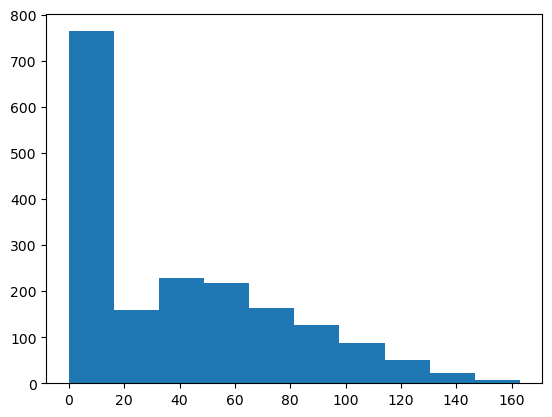

In [16]:
# Histogram plot of started sessions
plt.hist(df_reporting["Started Sessions"])

In [17]:
# Convert Dataframe to timeline
df_reporting_timeline = df_reporting.copy()
df_reporting_timeline['Day'] = pd.to_datetime(df_reporting_timeline['Day'])
df_reporting_timeline = df_reporting_timeline.set_index('Day')

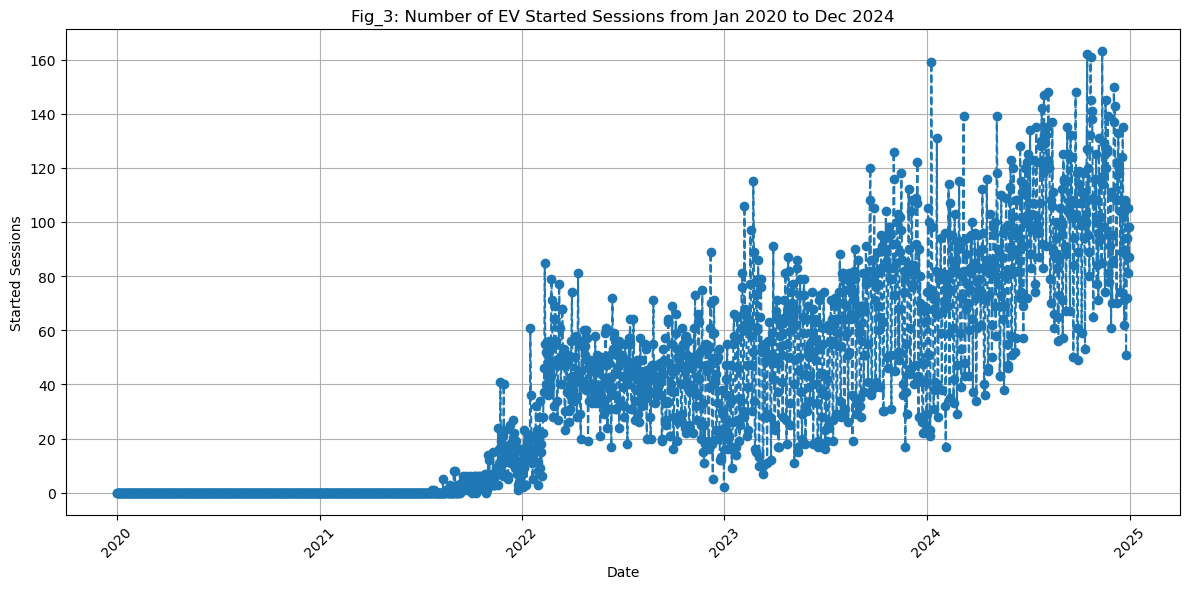

In [18]:
# Plot the timeline of started sessions
plt.figure(figsize=(12, 6))
plt.plot(df_reporting_timeline.index, df_reporting_timeline['Started Sessions'], '--o')
plt.title('Fig_3: Number of EV Started Sessions from Jan 2020 to Dec 2024')
plt.xlabel('Date')
plt.ylabel('Started Sessions')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig('images/fig3.jpg')
plt.show()

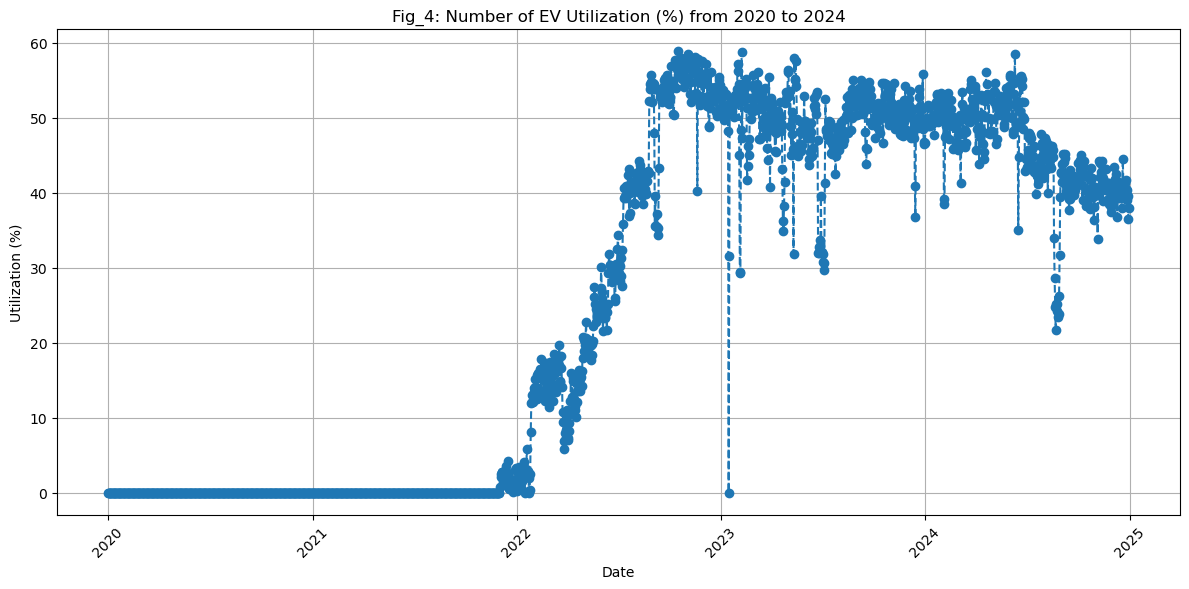

In [19]:
# Plot the timeline of started sessions
plt.figure(figsize=(12, 6))
plt.plot(df_reporting_timeline.index, df_reporting_timeline['Utilization (%)'], '--o')
plt.title('Fig_4: Number of EV Utilization (%) from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Utilization (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig('images/fig4.jpg')
plt.show()

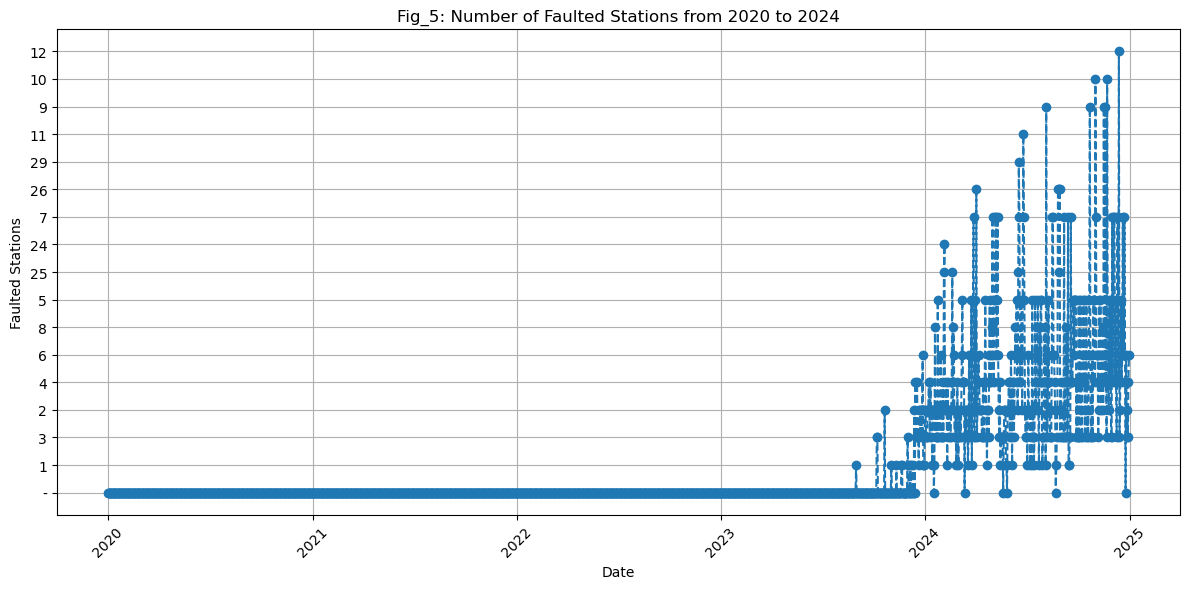

In [20]:
# Plot the timeline of started sessions
plt.figure(figsize=(12, 6))
plt.plot(df_reporting_timeline.index, df_reporting_timeline['Faulted Stations'], '--o')
plt.title('Fig_5: Number of Faulted Stations from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Faulted Stations')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig('images/fig5.jpg')
plt.show()